In [50]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

## Load and Prepare Data
Loading the Iris dataset, splitting it into features and target, and examining the dataset for any imbalances or missing values.

To improve the model's generalization ability, we removed 'Id' to allow the model to focus on biologically relevant data.

In [55]:
# Load dataset
data = pd.read_csv("Iris.csv")  # Adjust path as needed
data.drop("Id",axis="columns",inplace=True)
X = data.drop("Species", axis=1)  # Features
y = data["Species"]  # Target

# Quick data check
print(data.head())
print(data["Species"].value_counts())  # Checking class balance

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Data Visualization
Creating scatter plots and pair plots to visualize relationships among features and identify feature separations between species.

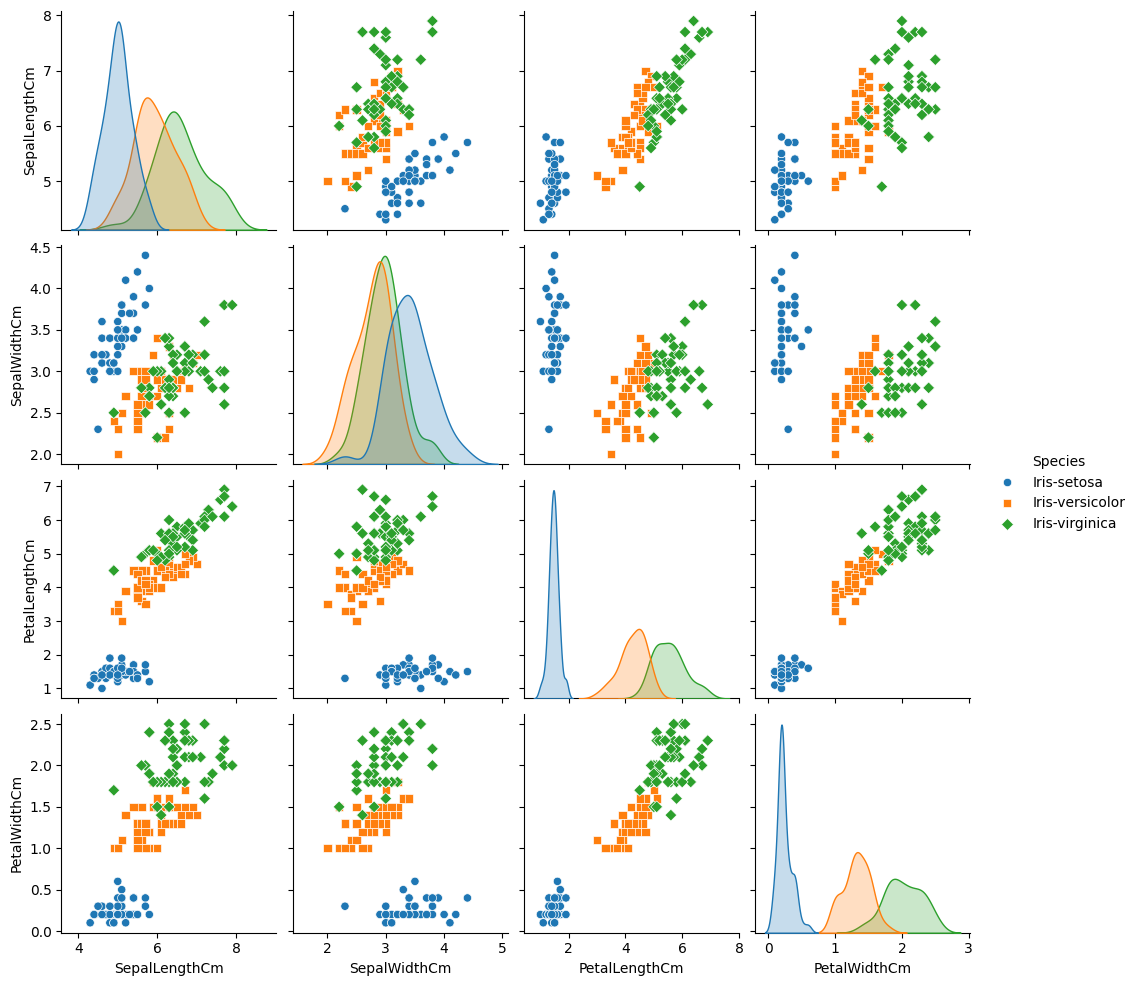

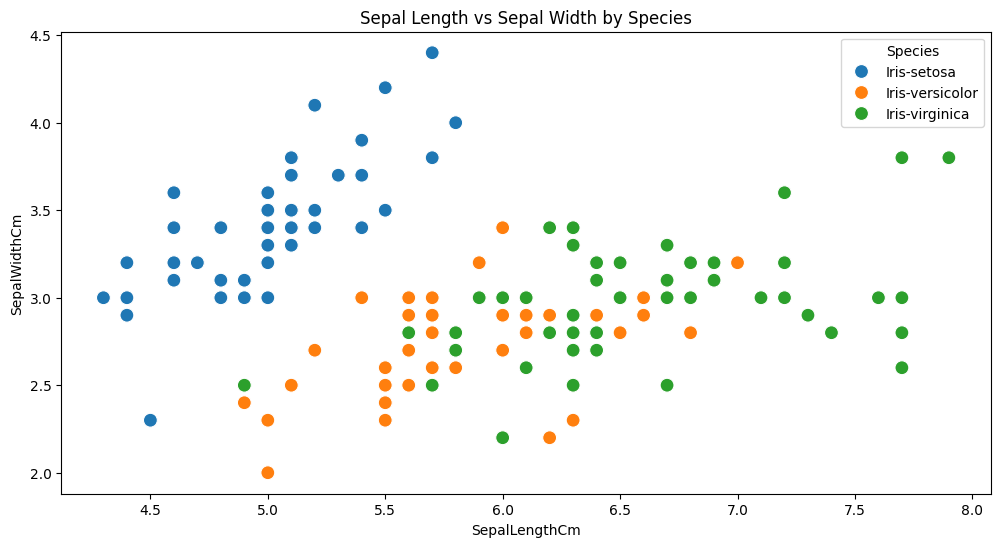

In [56]:
# Pair plot to visualize feature relationships by species
sns.pairplot(data, hue="Species", markers=["o", "s", "D"])
plt.show()

# Scatter plot for specific feature pairs
plt.figure(figsize=(12, 6))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data, s=100)
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()


## Train-Test Split and Scaling
Splitting data into training and testing sets, then applying scaling for KNN and SVM models, which are sensitive to feature magnitudes.

We used StandardScaler to scale features in a dataset, specifically for preparing data for machine learning algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM).

StandardScaler: This is a preprocessing tool from the sklearn.preprocessing module that standardizes the features by removing the mean and scaling to unit variance. The formula it uses is:

ùëß = ( ùë• ‚àí ùúá ) / ùúé  (formula-1)

where Œº is the mean of the feature values and œÉ is the standard deviation.

When you call scaler.fit_transform(X_train), the StandardScaler computes the mean and standard deviation for each feature in the training dataset (X_train). This means that it analyzes the distribution of each feature in X_train and calculates these statistics.

After calculations, fit_transform standardizes the training data by applying the formula-1. As a result, X_train_scaled is a new dataset where each feature has a mean of 0 and a standard deviation of 1. This transformation ensures that the training data is centered around zero and scaled appropriately.

scaler.transform(X_test) uses the mean and standard deviation calculated from the TRAINING data to standardize the test dataset. This ensures that the test data is transformed in the same way as the training data, maintaining consistency. The resulting X_test_scaled will also have features centered around the same mean and scaled by the same standard deviation as the training data.

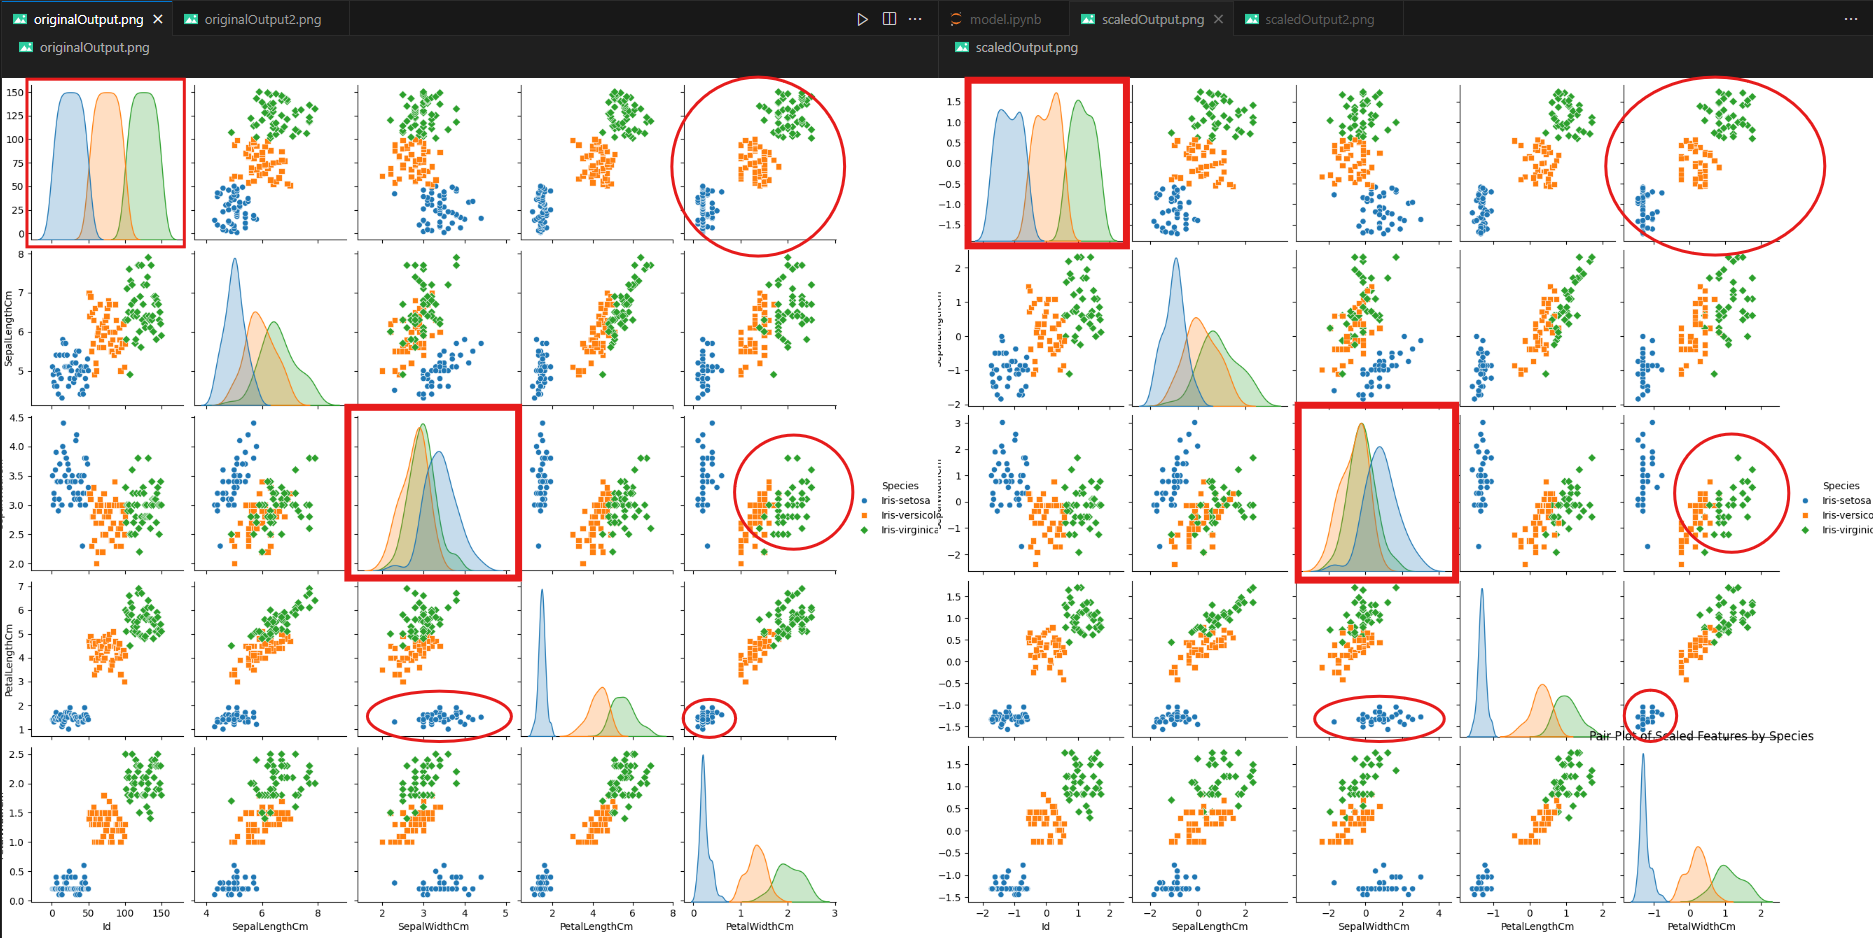

However, scaled dataset is not typically required for Random Forests. Because it is an ensemble of decision trees, which are inherently insensitive to the scale of the features. Decision trees split the data based on thresholds of feature values, meaning that the absolute values of the features do not affect how the trees are constructed. 

Additionally, scaling can sometimes make it more difficult to interpret the feature importances from tree-based models because the importance scores are based on the original feature values. If the features have been scaled, the original context might be lost.

In another word, StandardScaler is creating a *consistent* new dataset for both the training and test sets based on the original data, specifically using the mean and standard deviation calculated from the training set.

In [57]:
# Train-test split
from sklearn.metrics import auc, roc_curve


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling features for KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Evaluation function
def evaluate_model(name, y_test, predictions, model=None):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average="weighted")
    recall = recall_score(y_test, predictions, average="weighted")
    auc = (
        roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class="ovr")
        if model
        else "N/A"
    )
    print(
        f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, AUC: {auc}"
    )

**Accuracy** is the ratio of correctly predicted instances to the total instances. (be misleading for imbalanced datasets)
Formula: Accuracy= (TP+TN)/(TP+TN+FP+FN)

**Precision** is the ratio of correctly predicted positive observations to the total predicted positives. (crucial in scenarios where false positives are costly)
Formula: Precision= TP/(TP+FP)

**Recall** (also known as Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all relevant cases. (good at capturing relations) (important in medical diagnoses or fraud detection)
Formula: Recall= TP/(TP+FN)

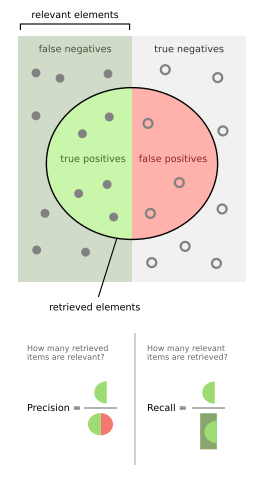


**The ROC (Receiver Operating Characteristic) curve** is a plot that shows the performance of a classifier across all classification thresholds.
*True Positive Rate (TPR):*Recall
*False Positive Rate (FPR):* The proportion of negatives incorrectly classified as positive.
Formula: FPR = FP/(FP+TN)
The ROC curve plots TPR against FPR at various threshold levels.

**The AUC (Area Under the Curve)** represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance


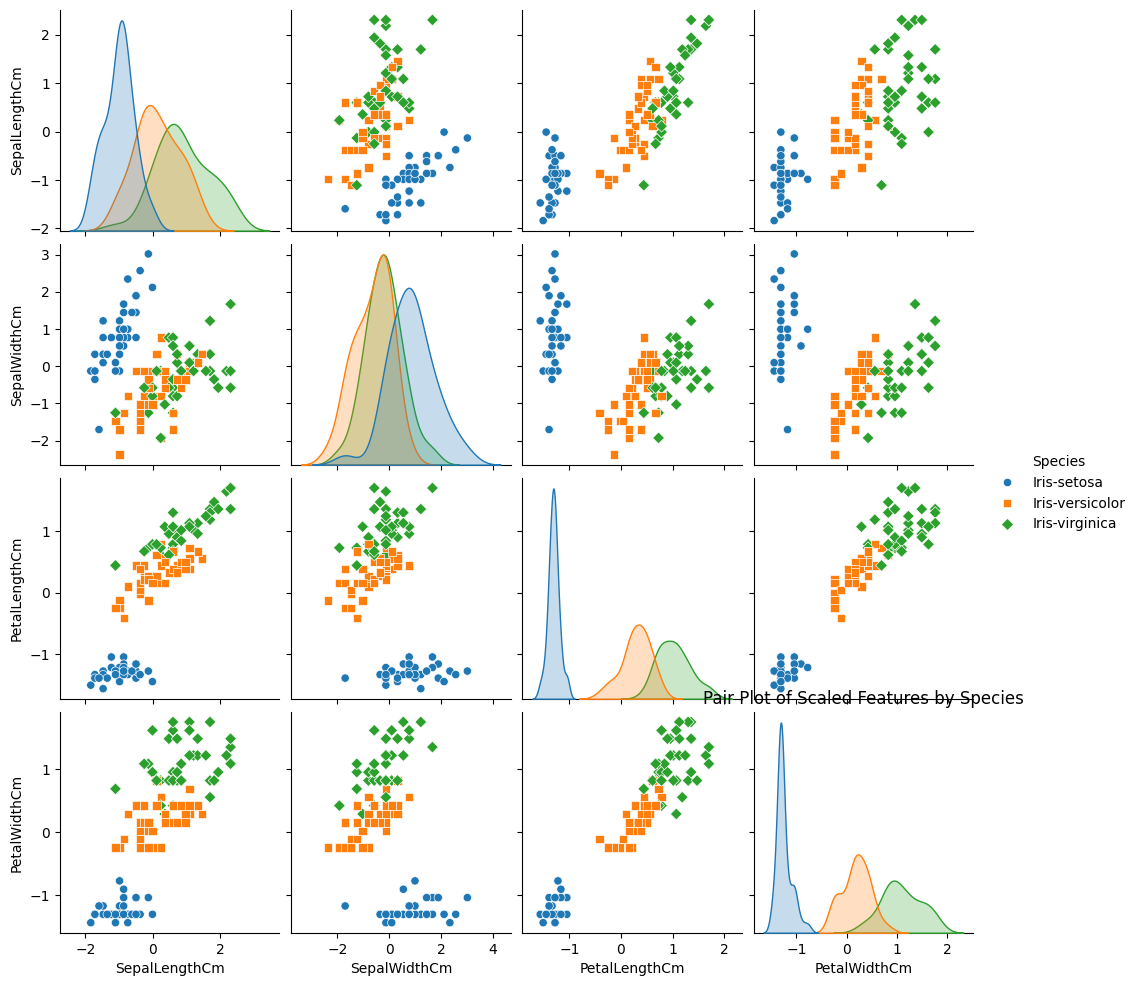

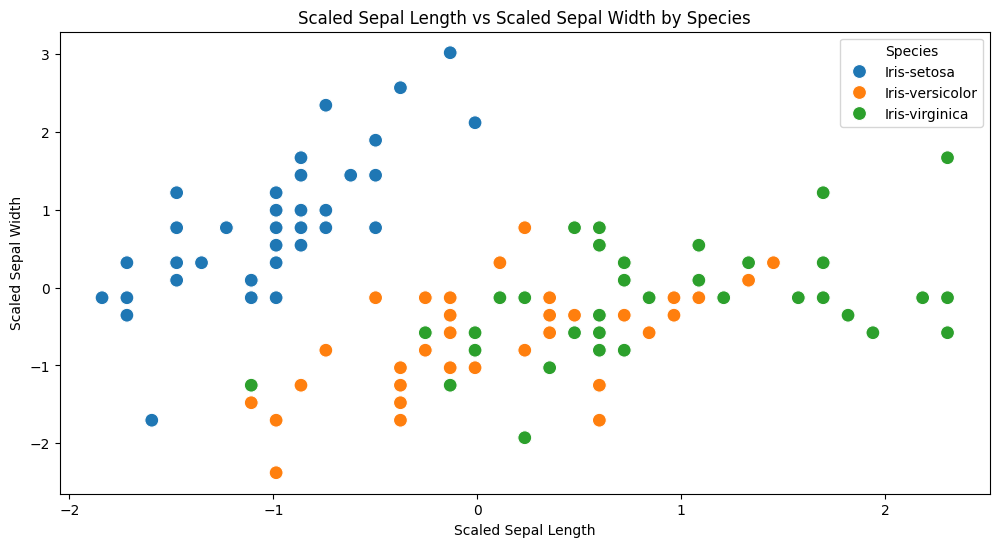

In [58]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df['Species'] = y_train.reset_index(drop=True)

# Pair plot to visualize feature relationships by species (scaled)
sns.pairplot(X_train_scaled_df, hue="Species", markers=["o", "s", "D"])
plt.title("Pair Plot of Scaled Features by Species",loc='center')
plt.show()

# Scatter plot for specific feature pairs (scaled)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_scaled_df["SepalLengthCm"], 
                y=X_train_scaled_df["SepalWidthCm"], 
                hue=X_train_scaled_df["Species"], 
                s=100)
plt.title("Scaled Sepal Length vs Scaled Sepal Width by Species")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.show()

## Random Forest Model Training and Evaluation
Training the Random Forest model and evaluating it on the test data.

Random Forest Model 1 (Default) - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, AUC: N/A
Random Forest Model 2 (Tuned) - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, AUC: N/A


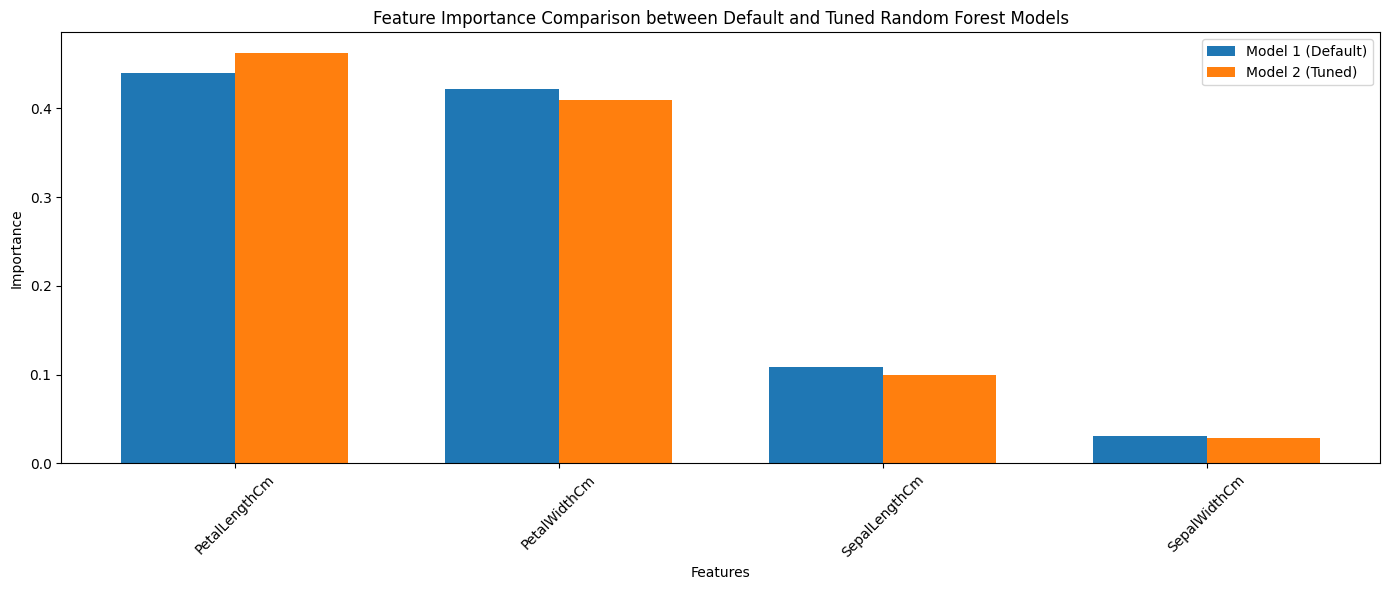

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Model 1: Default hyperparameters
rf_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_1.fit(X_train, y_train)
rf_pred_1 = rf_model_1.predict(X_test)

# Model 2: Tuned hyperparameters
rf_model_2 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model_2.fit(X_train, y_train)
rf_pred_2 = rf_model_2.predict(X_test)

evaluate_model("Random Forest Model 1 (Default)", y_test, rf_pred_1)
evaluate_model("Random Forest Model 2 (Tuned)", y_test, rf_pred_2)

# Extract feature importances for both models
importances_1 = rf_model_1.feature_importances_
importances_2 = rf_model_2.feature_importances_
features = X.columns

# Sorting features by importance for better visualization
indices_1 = np.argsort(importances_1)[::-1]
indices_2 = np.argsort(importances_2)[::-1]

# Plotting side-by-side comparison of feature importances
plt.figure(figsize=(14, 6))

# Bar width for side-by-side bars
bar_width = 0.35
index = np.arange(len(features))

# Bar chart for Model 1
plt.bar(index, importances_1[indices_1], bar_width, label="Model 1 (Default)")
# Bar chart for Model 2
plt.bar(index + bar_width, importances_2[indices_2], bar_width, label="Model 2 (Tuned)")

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance Comparison between Default and Tuned Random Forest Models")
plt.xticks(index + bar_width / 2, features[indices_1], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


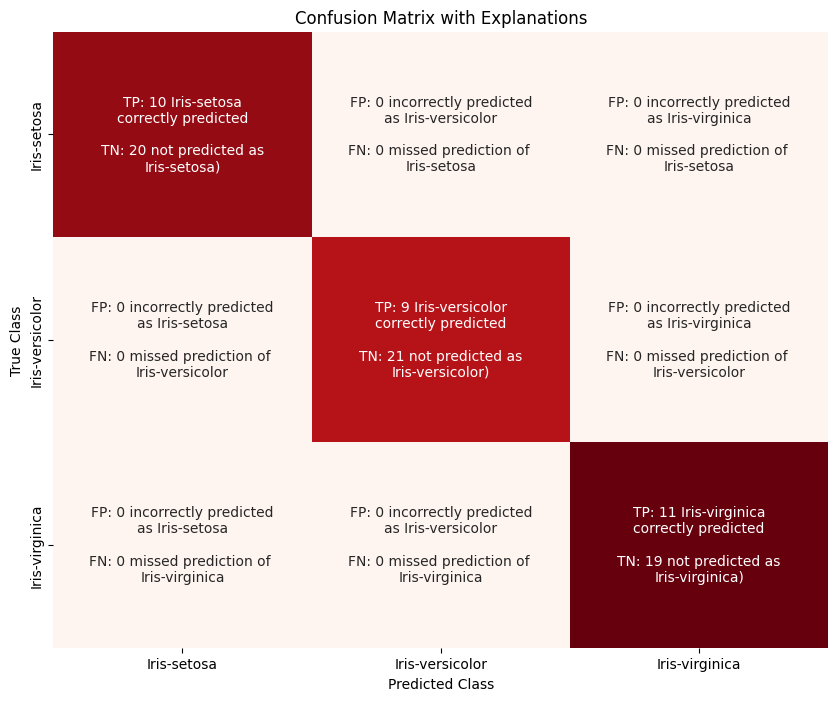

--------------------------------------
Accuracy: 1.00, Precision: nan, Recall: nan


C:\Users\burci\AppData\Local\Temp\ipykernel_20248\3313812374.py:68: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)
C:\Users\burci\AppData\Local\Temp\ipykernel_20248\3313812374.py:69: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP / (TP + FN)


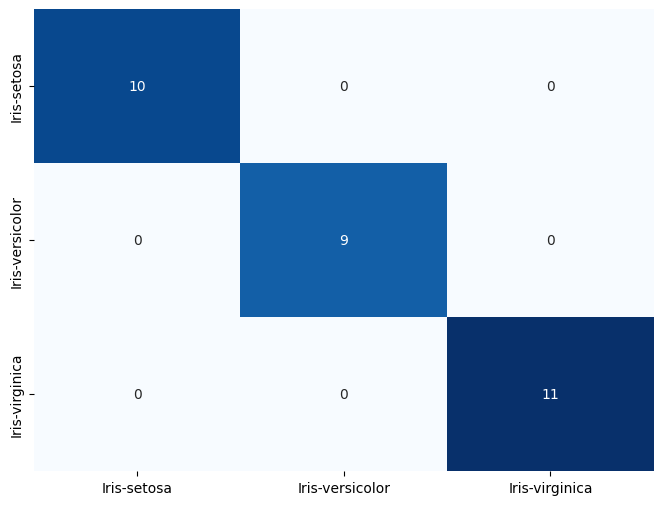

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix kullanarak TP, FP, TN, FN deƒüerlerini bul
cm = confusion_matrix(y_test, rf_pred_1)
species_names = data["Species"].unique()
# print("Confusion Matrix:\n", cm)

# Calculate TN for each class
tn_class_1 = cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2]  # TN for Setosa
tn_class_2 = cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2]  # TN for Versicolor
tn_class_3 = cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1]  # TN for Virginica
explanation_matrix = np.empty_like(cm, dtype=object)

# Populate TP, FP, FN, and TN for each cell
for i in range(len(species_names)):
    for j in range(len(species_names)):
        if i == j:
            # True Positive (TP) for class i
            TP = cm[i, j]
            # False Positive (FP) for class i (sum of column minus TP)
            FP = cm[:, j].sum() - TP
            # False Negative (FN) for class i (sum of row minus TP)
            FN = cm[i, :].sum() - TP
            # True Negative (TN) for class i
            TN = cm.sum() - (TP + FP + FN)
            explanation_matrix[i, j] = (
                f"TP: {TP} {species_names[i]}\ncorrectly predicted\n\n"
                f"TN: {TN} not predicted as\n{species_names[i]})"
            )
        else:
            # False Positive for class j, False Negative for class i
            FP = cm[:, j].sum() - cm[j, j]
            FN = cm[i, :].sum() - cm[i, i]
            explanation_matrix[i, j] = (
                f"FP: {cm[i, j]} incorrectly predicted\nas {species_names[j]}\n\n"
                f"FN: {cm[i, j]} missed prediction of \n{species_names[i]}"
            )
# Plotting the confusion matrix with explanations
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=explanation_matrix, fmt='', cmap='Reds', cbar=False, 
            xticklabels=species_names, yticklabels=species_names)

plt.title('Confusion Matrix with Explanations')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=species_names,
    yticklabels=species_names,
)

print("--------------------------------------")


TN, FP, FN, TP, _, _, _, _, _ = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

## K-Nearest Neighbors Model Training and Evaluation
Training and evaluating the KNN model using scaled data for optimal performance.

In [61]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

# Evaluation
evaluate_model("KNN", y_test, knn_pred, knn_model)

KNN - Accuracy: 1.00, Precision: 1.00, Recall: 1.00, AUC: 1.0


## Support Vector Machine Model Training and Evaluation
Training the SVM model with a linear kernel and evaluating its performance using scaled data.

In [62]:
# Train SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

# Evaluation
evaluate_model("SVM", y_test, svm_pred, svm_model)

SVM - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, AUC: 1.0


## Cross-Validation and Summary
Performing cross-validation on all models and comparing the results.

In [64]:
# Cross-validation scores
rf1_cv = cross_val_score(rf_model_1, X, y, cv=5).mean()
rf2_cv = cross_val_score(rf_model_2, X, y, cv=5).mean()
knn_cv = cross_val_score(knn_model, X_train_scaled, y_train, cv=5).mean()
svm_cv = cross_val_score(svm_model, X_train_scaled, y_train, cv=5).mean()

# Print results
print(
    f"Cross-Validation - \nRandom Forest-1: {rf1_cv:.2f}\n"
    f"Random Forest-2: {rf2_cv:.2f}\n"
    f"KNN: {knn_cv:.2f}\nSVM: {svm_cv:.2f}"
)

Cross-Validation - Random Forest: 0.97, KNN: 0.93, SVM: 0.95


## Why Random Forest Despite Lower Cross-Validation
Random Forest may have a slightly lower cross-validation score because it‚Äôs more complex than KNN or SVM, which can lead to overfitting when data is limited. However, Random Forest remains valuable for its interpretability, feature importance insights, and resilience against variance, making it a strong choice even with a slightly lower cross-validation score.